In [104]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# matplotlib 한글 폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic') 		
plt.rcParams['axes.unicode_minus'] = False  

In [105]:
lonely_df = pd.read_csv("../data/고독사_발생_현황.csv", encoding='utf-8')
total_df = pd.read_csv("../data/전체_인구_현황.csv", encoding='utf-8')
Single_df = pd.read_csv("../data/1인_가구_현황.csv", encoding='utf-8')


In [106]:
lonely_df

,연령별(1),2017,2017.1,2017.2,2017.3,2018,2018.1,2018.2,2018.3,2019,...,2021.2,2021.3,2022,2022.1,2022.2,2022.3,2023,2023.1,2023.2,2023.3
0,연령별(1),계,남자,여자,미상,계,남자,여자,미상,계,...,여자,미상,계,남자,여자,미상,계,남자,여자,미상
1,계,2412,1923,426,63,3048,2450,515,83,2949,...,529,32,3559,2970,557,32,3661,3053,579,29
2,19세이하,1,0,1,0,1,0,1,0,1,...,1,0,1,1,0,0,0,0,0,0
3,20대,54,35,18,1,53,36,16,1,54,...,16,0,60,44,15,1,42,22,20,0
4,30대,149,98,49,2,186,135,48,3,164,...,44,0,147,111,35,1,166,115,51,0
5,40대,435,362,63,10,470,405,52,13,520,...,88,2,525,423,97,5,502,402,98,2
6,50대,776,679,71,26,922,808,97,17,885,...,91,10,1077,946,121,10,1097,970,123,4
7,60대,497,413,74,10,746,631,87,28,702,...,114,7,1110,979,128,3,1146,1004,138,4
8,70대,278,196,77,5,387,259,116,12,376,...,104,3,433,339,91,3,470,387,79,4
9,80대이상,120,59,60,1,177,96,78,3,179,...,67,1,186,118,68,0,205,135,67,3


In [107]:
df_2023 = lonely_df[['연령별(1)', '2023.1','2023.2']]
df_2023.columns = ['연령대','남자','여자']

df_2023

,연령대,남자,여자
0,연령별(1),남자,여자
1,계,3053,579
2,19세이하,0,0
3,20대,22,20
4,30대,115,51
5,40대,402,98
6,50대,970,123
7,60대,1004,138
8,70대,387,79
9,80대이상,135,67


/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_3949/3040395626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['남자'] = pd.to_numeric(df_2023['남자'], errors='coerce')
/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_3949/3040395626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['여자'] = pd.to_numeric(df_2023['여자'], errors='coerce')


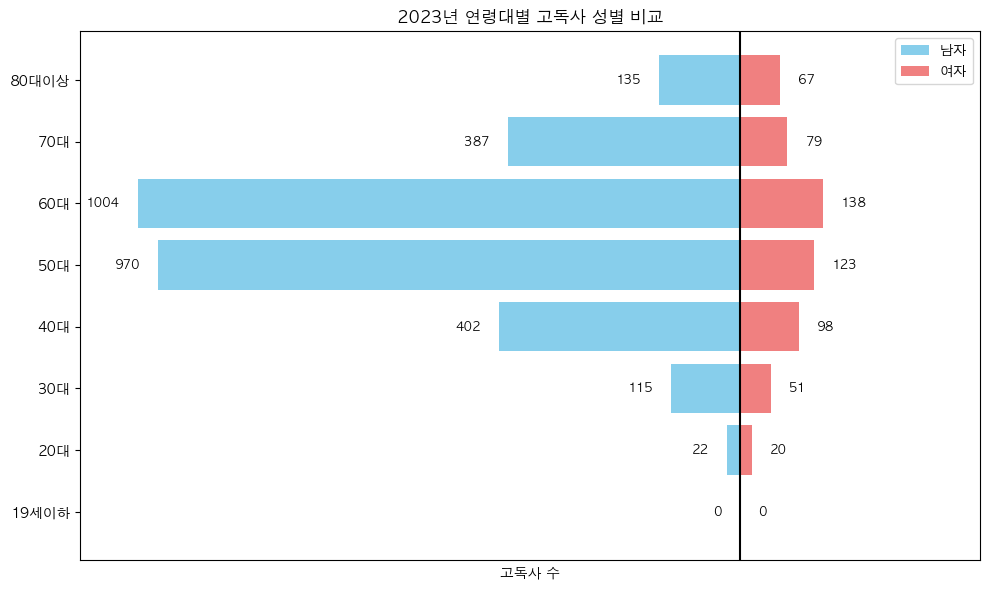

In [108]:
# 수치형으로 변환
df_2023['남자'] = pd.to_numeric(df_2023['남자'], errors='coerce')
df_2023['여자'] = pd.to_numeric(df_2023['여자'], errors='coerce')

# '계'와 '미상' 제거
df_2023_sex = df_2023[~df_2023['연령대'].isin(['계', '미상'])]

# 양방향 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(df_2023_sex['연령대'], -df_2023_sex['남자'], color='skyblue', label='남자')
plt.barh(df_2023_sex['연령대'], df_2023_sex['여자'], color='lightcoral', label='여자')
plt.axvline(0, color='black')
plt.xlabel('고독사 수')
plt.xticks([])
plt.xlim(-1100, 400)
plt.title('2023년 연령대별 고독사 성별 비교')
plt.legend()
bars_male = plt.barh(df_2023_sex['연령대'], -df_2023_sex['남자'], color='skyblue', label='남자')
bars_female = plt.barh(df_2023_sex['연령대'], df_2023_sex['여자'], color='lightcoral', label='여자')

# ✅ 막대 옆에 숫자 표시
for bar in bars_male:
    width = bar.get_width()
    if not np.isnan(width):
        plt.text(width - 30, bar.get_y() + bar.get_height()/2, f'{-int(width)}', va='center', ha='right', fontsize=9)

for bar in bars_female:
    width = bar.get_width()
    if not np.isnan(width):
        plt.text(width + 30, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', ha='left', fontsize=9)


plt.tight_layout()
plt.show()

In [109]:
lonely_total = lonely_df[lonely_df['연령별(1)'] == '계']

# 연도 컬럼만 추출
lonely_total_cleaned = lonely_total[['2017', '2018', '2019', '2020', '2021', '2022', '2023']]

# 세로 구조로 변환 (연도, 사망자수)
lonely_total_melted = lonely_total_cleaned.melt(var_name='연도', value_name='고독사 사망자수')


In [110]:
lonely_total_melted

,연도,고독사 사망자수
0,2017,2412
1,2018,3048
2,2019,2949
3,2020,3279
4,2021,3378
5,2022,3559
6,2023,3661


In [111]:
total_df

,기본항목별,2017,2018,2019,2020,2021,2022,2023
0,출생아수(명),357771.000,326822.000,302676.000,272337.000,260562.000,249186.000,230028.000
1,사망자수(명),285534.000,298820.000,295110.000,304948.000,317680.000,372939.000,352511.000
2,자연증가건수(명),72237.000,28002.000,7566.000,-32611.000,-57118.000,-123753.000,-122483.000
3,조출생률(천명당),7.000,6.400,5.900,5.300,5.100,4.900,4.500
4,조사망률(천명당),5.600,5.800,5.700,5.900,6.200,7.300,6.900
5,자연증가율(천명당),1.400,0.500,0.100,-0.600,-1.100,-2.400,-2.400
6,합계출산율(명),1.052,0.977,0.918,0.837,0.808,0.778,0.721
7,출생성비(명),106.300,105.400,105.500,104.800,105.100,104.700,105.100
8,영아사망률(출생아 천명당),2.800,2.800,2.700,2.500,2.400,2.300,2.500
9,혼인건수(건),264455.000,257622.000,239159.000,213502.000,192507.000,191690.000,193657.000


In [112]:
# 전체 사망자 수 필터링 및 정리
total_cleaned = total_df[total_df['기본항목별'] == '사망자수(명)']

# 필요한 연도만 선택
total_cleaned = total_cleaned[['기본항목별', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]

# 세로로 변환
total_melted = total_cleaned.melt(id_vars='기본항목별', var_name='연도', value_name='전체 사망자수')
total_melted = total_melted[['연도', '전체 사망자수']]
total_melted['연도'] = total_melted['연도'].astype(int)
total_melted['전체 사망자수'] = total_melted['전체 사망자수'].astype(int)

# 정렬
total_melted = total_melted.sort_values(by='연도').reset_index(drop=True)

In [113]:
total_melted

,연도,전체 사망자수
0,2017,285534
1,2018,298820
2,2019,295110
3,2020,304948
4,2021,317680
5,2022,372939
6,2023,352511


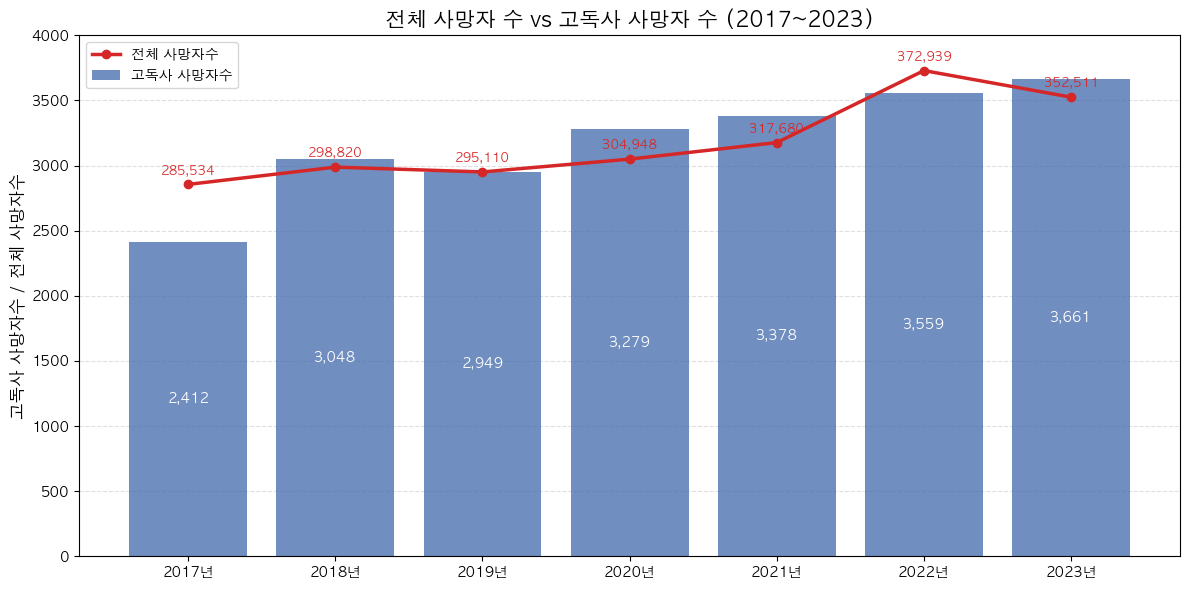

In [114]:

lonely_total_melted['고독사 사망자수'] = lonely_total_melted['고독사 사망자수'].astype(int)
total_melted['전체 사망자수'] = total_melted['전체 사망자수'].astype(int)

# 연도 리스트
years = lonely_total_melted['연도'].tolist()
years = [f"{year}년" for year in years]
lonely = lonely_total_melted['고독사 사망자수'].tolist()
total = total_melted['전체 사망자수'].tolist()

fig, ax = plt.subplots(figsize=(12, 6))

# 고독사 막대그래프
bars = ax.bar(years, lonely, color='#4C72B0', alpha=0.8, label='고독사 사망자수', zorder=2)
for bar, val in zip(bars, lonely):
    bar_x_center = bar.get_x() + bar.get_width() / 2
    ax.text(bar_x_center, val / 2, f'{val:,}', ha='center', va='center', fontsize=10, color='white')

# 전체 사망자 꺾은선 그래프
scaled_total = [v / 100 for v in total]
ax.plot(years, scaled_total, color='#D62728', marker='o', linewidth=2.5, label='전체 사망자수', zorder=3)
for i, val in enumerate(scaled_total):
    ax.text(years[i], val + 60, f'{total[i]:,}', ha='center', va='bottom', fontsize=9, color='#D62728')

# 축/타이틀/범례 설정
ax.set_ylabel('고독사 사망자수 / 전체 사망자수', fontsize=12)
ax.set_title('전체 사망자 수 vs 고독사 사망자 수 (2017~2023)', fontsize=15)
ax.set_ylim(0, 4000)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [115]:
Single_df

,행정구역별(시군구),성별,연령,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7
0,행정구역별(시군구),성별,연령,1인가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대 주택,주택_비주거용 건물 내 주택,주택 이외의 거처_계
1,전국,계,합계,7829035,6927942,3138536,2734369,141176,774036,139825,901093
2,전국,계,20세 미만,48486,43197,31605,6250,387,3014,1941,5289
3,전국,계,20~24,494745,417850,282616,68066,4774,45992,16402,76895
4,전국,계,25~29,910457,710721,355719,214345,11874,107377,21406,199736
...,...,...,...,...,...,...,...,...,...,...,...
1004,제주특별자치도,여자,65~69,4263,3986,1911,1184,364,424,103,277
1005,제주특별자치도,여자,70~74,3090,2951,1447,888,226,316,74,139
1006,제주특별자치도,여자,75~79,2907,2788,1575,753,159,241,60,119
1007,제주특별자치도,여자,80~84,2743,2652,1722,572,156,172,30,91


In [116]:
Single_df

,행정구역별(시군구),성별,연령,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7
0,행정구역별(시군구),성별,연령,1인가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대 주택,주택_비주거용 건물 내 주택,주택 이외의 거처_계
1,전국,계,합계,7829035,6927942,3138536,2734369,141176,774036,139825,901093
2,전국,계,20세 미만,48486,43197,31605,6250,387,3014,1941,5289
3,전국,계,20~24,494745,417850,282616,68066,4774,45992,16402,76895
4,전국,계,25~29,910457,710721,355719,214345,11874,107377,21406,199736
...,...,...,...,...,...,...,...,...,...,...,...
1004,제주특별자치도,여자,65~69,4263,3986,1911,1184,364,424,103,277
1005,제주특별자치도,여자,70~74,3090,2951,1447,888,226,316,74,139
1006,제주특별자치도,여자,75~79,2907,2788,1575,753,159,241,60,119
1007,제주특별자치도,여자,80~84,2743,2652,1722,572,156,172,30,91


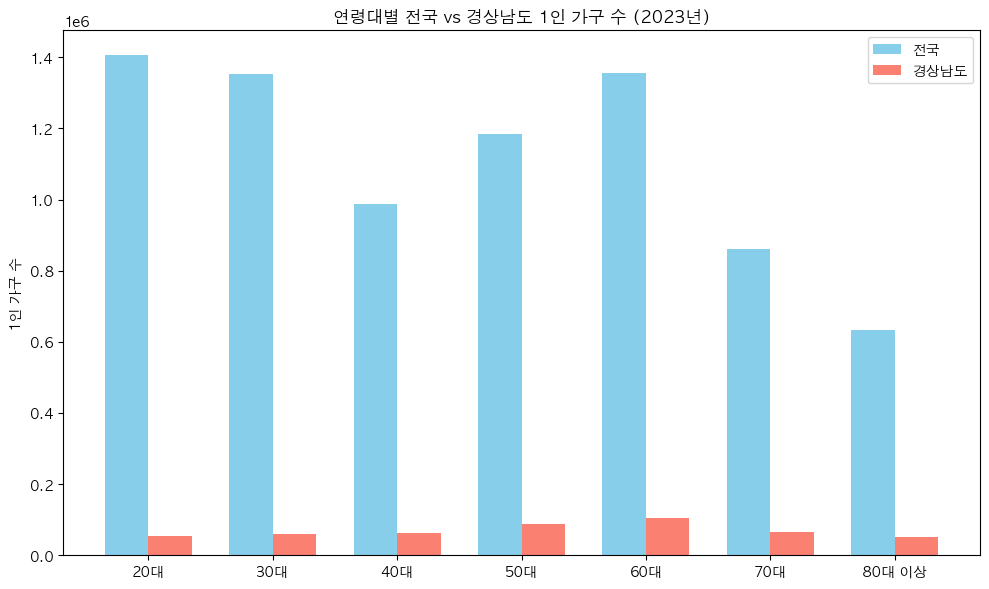

In [ ]:
# 전국 1인 가구 연령대별 집계
nation_df = Single_df[(Single_df['행정구역별(시군구)'] == '전국') & (Single_df['성별'] == "계")].copy()
nation_df['연령'] = nation_df['연령'].str.strip()
nation_df['2023'] = pd.to_numeric(nation_df['2023'], errors='coerce')

# 연령 그룹 매핑 적용
nation_df['연령대'] = nation_df['연령'].map(group_map)
nation_df = nation_df[nation_df['연령대'].notnull()]

nation_grouped = nation_df.groupby('연령대')['2023'].sum().reset_index()
nation_grouped.columns = ['연령대', '전국 1인 가구 수']

# 10대 제외
nation_grouped = nation_grouped[nation_grouped['연령대'] != '10대']
gyeongnam_grouped = grouped.copy()
gyeongnam_grouped.columns = ['연령대', '경남 1인 가구 수']

# 데이터 병합
compare_df = pd.merge(nation_grouped, gyeongnam_grouped, on='연령대', how='inner')

# 시각화
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(compare_df['연령대']))

plt.bar(x - bar_width/2, compare_df['전국 1인 가구 수'], width=bar_width, label='전국', color='skyblue')
plt.bar(x + bar_width/2, compare_df['경남 1인 가구 수'], width=bar_width, label='경상남도', color='salmon')

plt.xticks(x, compare_df['연령대'])
plt.ylabel('1인 가구 수')
plt.title('연령대별 전국 vs 경상남도 1인 가구 수 (2023년)')
plt.legend()
plt.tight_layout()
plt.show()

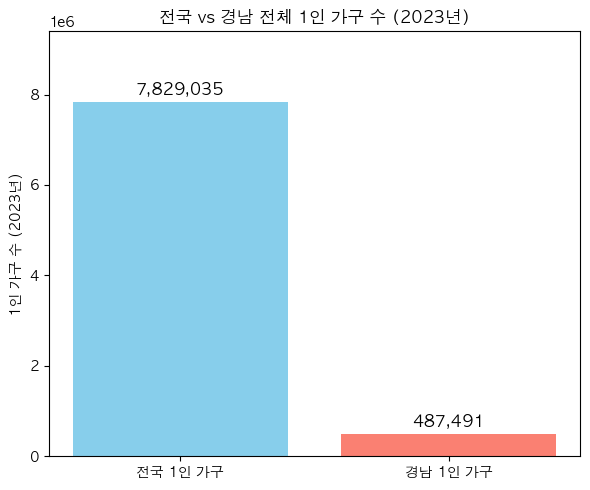

In [128]:
# '합계' 연령 조건과 '전국', '경상남도' 기준으로 1인 가구 수 추출
nation_total_single = Single_df[(Single_df['연령'] == '합계') & (Single_df['행정구역별(시군구)'] == '전국') & (Single_df['성별'] == '계')]['2023'].values[0]
gyeongnam_total_single = Single_df[(Single_df['연령'] == '합계') & (Single_df['행정구역별(시군구)'] == '경상남도') & (Single_df['성별'] == '계')]['2023'].values[0]

# 수치형 변환
nation_total_single = int(nation_total_single.replace(',', '')) if isinstance(nation_total_single, str) else int(nation_total_single)
gyeongnam_total_single = int(gyeongnam_total_single.replace(',', '')) if isinstance(gyeongnam_total_single, str) else int(gyeongnam_total_single)

# 막대그래프 시각화
plt.figure(figsize=(6, 5))
labels = ['전국 1인 가구', '경남 1인 가구']
values = [nation_total_single, gyeongnam_total_single]
bars = plt.bar(labels, values, color=['skyblue', 'salmon'])

# 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100000, f"{height:,}", ha='center', va='bottom', fontsize=12)

plt.ylim(0, max(values) * 1.2)
plt.ylabel('1인 가구 수 (2023년)')
plt.title('전국 vs 경남 전체 1인 가구 수 (2023년)')
plt.tight_layout()
plt.show()

In [117]:
# 경상남도 데이터 필터링
gyeongnam_df = Single_df[(Single_df['행정구역별(시군구)'] == '경상남도') & (Single_df['성별'] == "계")] 
gyeongnam_df

,행정구역별(시군구),성별,연령,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7
913,경상남도,계,합계,487491,452608,251785,175514,7441,10828,7040,34883
914,경상남도,계,20세 미만,2103,1743,1270,350,14,27,82,360
915,경상남도,계,20~24,18665,16258,12195,3006,153,268,636,2407
916,경상남도,계,25~29,34706,29560,18168,9816,351,690,535,5146
917,경상남도,계,30~34,34744,30488,15243,13760,334,686,465,4256
918,경상남도,계,35~39,25929,23299,10571,11533,296,552,347,2630
919,경상남도,계,40~44,30772,28018,13273,13243,404,694,404,2754
920,경상남도,계,45~49,31268,28770,13862,13265,452,739,452,2498
921,경상남도,계,50~54,42060,38802,18990,17471,620,1055,666,3258
922,경상남도,계,55~59,44639,41411,21381,17418,751,1177,684,3228


In [118]:
# 문자열 앞뒤 공백 제거
gyeongnam_df['연령'] = gyeongnam_df['연령'].str.strip()

# 연령 그룹 매핑
group_map = {
    '20세 미만': '10대',
    '20~24': '20대', '25~29': '20대',
    '30~34': '30대', '35~39': '30대',
    '40~44': '40대', '45~49': '40대',
    '50~54': '50대', '55~59': '50대',
    '60~64': '60대', '65~69': '60대',
    '70~74': '70대', '75~79': '70대',
    '80~84' : '80대 이상','85세 이상': '80대 이상'
}

# 연령대 매핑
gyeongnam_df['연령대'] = gyeongnam_df['연령'].map(group_map)
# 연령대가 NaN인 행 제거
gyeongnam_df = gyeongnam_df[gyeongnam_df['연령대'].notnull()]
gyeongnam_df

/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_3949/3433025200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gyeongnam_df['연령'] = gyeongnam_df['연령'].str.strip()
/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_3949/3433025200.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gyeongnam_df['연령대'] = gyeongnam_df['연령'].map(group_map)


,행정구역별(시군구),성별,연령,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,연령대
914,경상남도,계,20세 미만,2103,1743,1270,350,14,27,82,360,10대
915,경상남도,계,20~24,18665,16258,12195,3006,153,268,636,2407,20대
916,경상남도,계,25~29,34706,29560,18168,9816,351,690,535,5146,20대
917,경상남도,계,30~34,34744,30488,15243,13760,334,686,465,4256,30대
918,경상남도,계,35~39,25929,23299,10571,11533,296,552,347,2630,30대
919,경상남도,계,40~44,30772,28018,13273,13243,404,694,404,2754,40대
920,경상남도,계,45~49,31268,28770,13862,13265,452,739,452,2498,40대
921,경상남도,계,50~54,42060,38802,18990,17471,620,1055,666,3258,50대
922,경상남도,계,55~59,44639,41411,21381,17418,751,1177,684,3228,50대
923,경상남도,계,60~64,54240,50971,27030,20769,924,1349,899,3269,60대


In [119]:
gyeongnam_df['2023'] = gyeongnam_df['2023'].astype(int)
grouped = gyeongnam_df.groupby('연령대')['2023'].sum().reset_index()
grouped.columns = ['연령대', '연령대별 1인 가구 수']
grouped

/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_3949/692490120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gyeongnam_df['2023'] = gyeongnam_df['2023'].astype(int)


,연령대,연령대별 1인 가구 수
0,10대,2103
1,20대,53371
2,30대,60673
3,40대,62040
4,50대,86699
5,60대,103908
6,70대,66032
7,80대 이상,52665


In [120]:
## 10대는 데이터량이 적어 제외
grouped = grouped[grouped['연령대'] != '10대']

([<matplotlib.patches.Wedge at 0x115d22990>,
 [Text(-1.0322890252802381, 0.37997285203811115, '20대'),
  Text(-1.0192988881258913, -0.4135574647679832, '30대'),
  Text(-0.41934933563542326, -1.0169297589814792, '40대'),
  Text(0.5950440095507359, -0.925160865308182, '50대'),
  Text(1.0699087889957377, 0.2555292218703652, '60대'),
  Text(0.2576749627418623, 1.0693940403686473, '70대'),
  Text(-0.5577928995032367, 0.9480860094230757, '80대 이상')],
 [Text(-0.563066741061948, 0.20725791929351514, '11.0%'),
  Text(-0.5559812117050316, -0.22557679896435445, '12.5%'),
  Text(-0.22873600125568538, -0.5546889594444431, '12.8%'),
  Text(0.3245694597549468, -0.5046331992590083, '17.9%'),
  Text(0.5835866121794931, 0.13937957556565372, '21.4%'),
  Text(0.14054997967737942, 0.5833058402010803, '13.6%'),
  Text(-0.3042506724563109, 0.5171378233216776, '10.9%')])

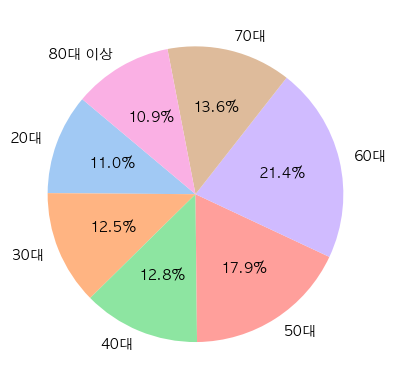

In [121]:
plt.pie(grouped['연령대별 1인 가구 수'], labels=grouped['연령대'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

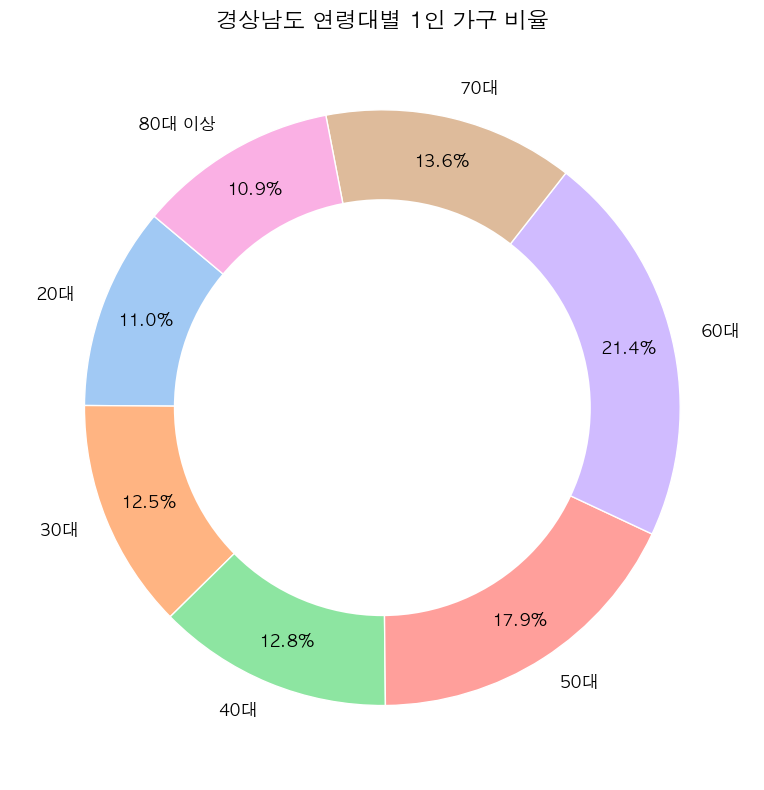

In [122]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")

wedges, texts, autotexts = plt.pie(
    grouped['연령대별 1인 가구 수'],
    labels=grouped['연령대'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white'}  # 흰색 테두리로 분리 강조
)

# 도넛 스타일 가운데 원 추가
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 텍스트 스타일 다듬기
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')

# 제목 및 레이아웃
plt.title('경상남도 연령대별 1인 가구 비율', fontsize=16)
plt.tight_layout()
plt.show()

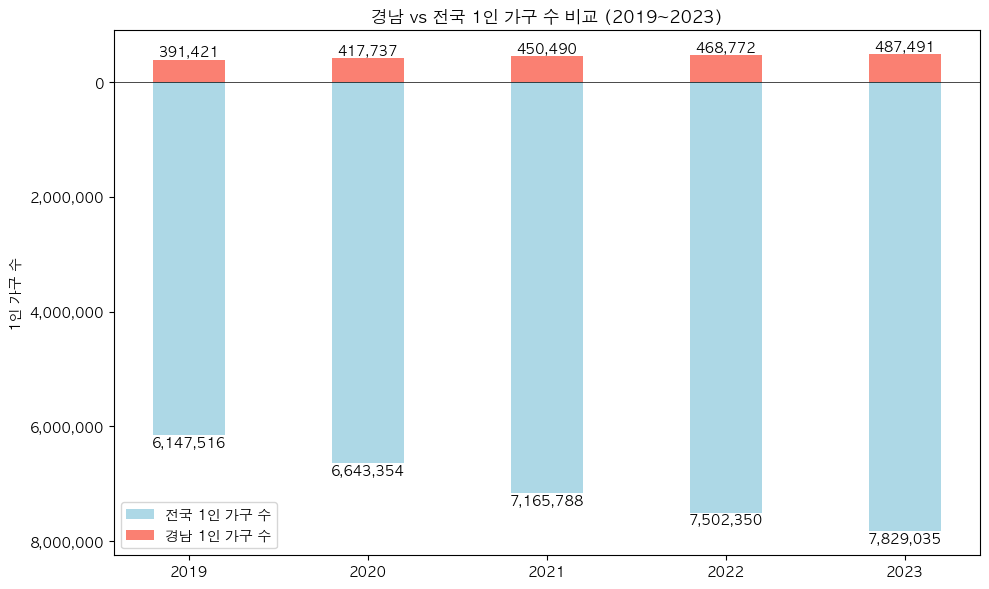

In [147]:
import matplotlib.ticker as ticker


df_total_years = pd.read_csv("../data/2019~2023_1인_가구.csv", encoding='utf-8')


# 연도별 컬럼 추출
year_cols = ['2019', '2020', '2021', '2022', '2023']

# 문자열이 아닌 경우 .str 사용 불가하므로 astype(str) 먼저 적용
nation_data = df_total_years[df_total_years['행정구역별(시군구)'] == '전국'][year_cols].iloc[0].astype(str).str.replace(',', '').astype(int)
gyeongnam_data = df_total_years[df_total_years['행정구역별(시군구)'] == '경상남도'][year_cols].iloc[0].astype(str).str.replace(',', '').astype(int)

# 시각화용 x축 연도 라벨
years = year_cols


plt.figure(figsize=(10, 6))
bar_width = 0.4
x = range(len(years))

# 전국은 아래로, 경남은 위로 분리
plt.bar(x, nation_data * -1, width=bar_width, label='전국 1인 가구 수', color='lightblue')
plt.bar(x, gyeongnam_data, width=bar_width, label='경남 1인 가구 수', color='salmon')

# 숫자 표시
for i, (n, g) in enumerate(zip(nation_data, gyeongnam_data)):
    plt.text(i, g + 10000, f'{g:,}', ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i, -n - 10000, f'{n:,}', ha='center', va='top', fontsize=10, color='black')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(abs(x)):,}' if x != 0 else '0'))

plt.axhline(0, color='black', linewidth=0.5)
plt.xticks(ticks=x, labels=years)
plt.title('경남 vs 전국 1인 가구 수 비교 (2019~2023)')
plt.ylabel('1인 가구 수')
plt.legend()
plt.tight_layout()
plt.show()

In [150]:
local_df = pd.read_csv("../data/고독사_1인가구_고령화.csv", encoding='utf-8')
local_df

,지역,고독사율 (%),1인 가구율 (%),고령화율 (%)
0,서울,0.16,38.2,17.2
1,부산,0.25,34.8,21.5
2,대구,0.28,32.5,20.3
3,인천,0.17,33.1,15.8
4,광주,0.16,35.0,16.5
5,대전,0.17,39.4,15.9
6,울산,0.21,31.2,14.8
7,경남,0.35,34.7,20.3
8,경북,0.29,31.9,22.7
9,전남,0.32,30.2,24.6


<BarContainer object of 15 artists>

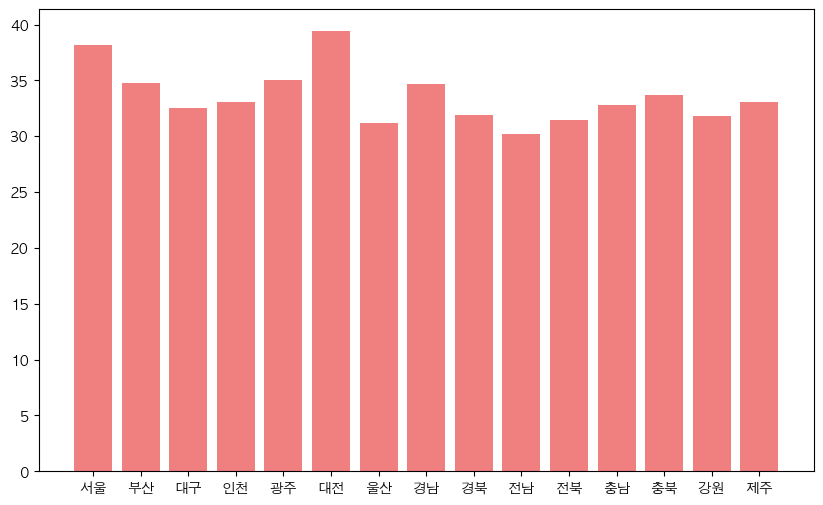

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(local_df['지역'], local_df['고독사율 (%)'], color='lightcoral', label='고독사 수')
plt.bar(local_df['지역'], local_df['1인 가구율 (%)'], color='lightcoral', label='1인 가구 수')
plt.bar(local_df['지역'], local_df['고령화율 (%)'], color='lightcoral', label='고령화 수')
plt.xlabel('지역')
plt.tight_layout()
plt.show()

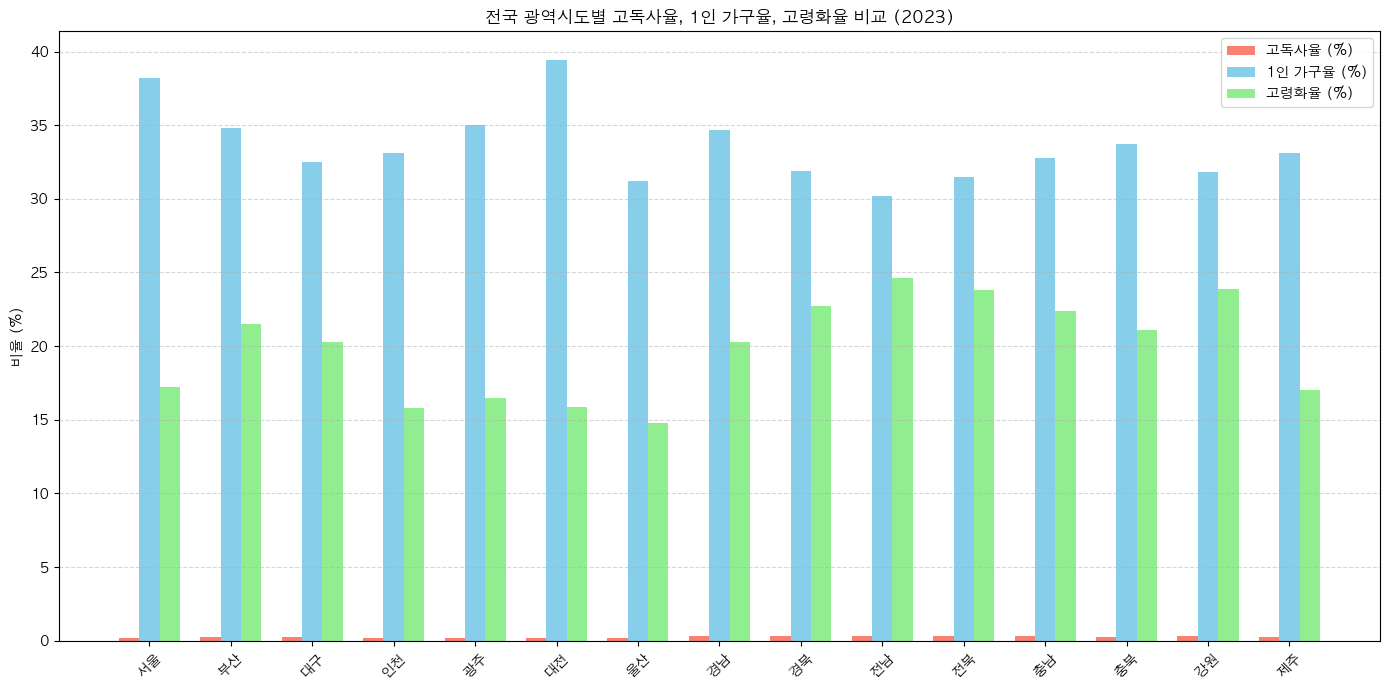

In [155]:

# 시각화
x = range(len(local_df['지역']))
bar_width = 0.25

plt.figure(figsize=(14, 7))
plt.bar([i - bar_width for i in x], local_df['고독사율 (%)'], width=bar_width, label='고독사율 (%)', color='salmon')
plt.bar(x, local_df['1인 가구율 (%)'], width=bar_width, label='1인 가구율 (%)', color='skyblue')
plt.bar([i + bar_width for i in x], local_df['고령화율 (%)'], width=bar_width, label='고령화율 (%)', color='lightgreen')

plt.xticks(ticks=x, labels=local_df['지역'], rotation=45)
plt.ylabel('비율 (%)')
plt.title('전국 광역시도별 고독사율, 1인 가구율, 고령화율 비교 (2023)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

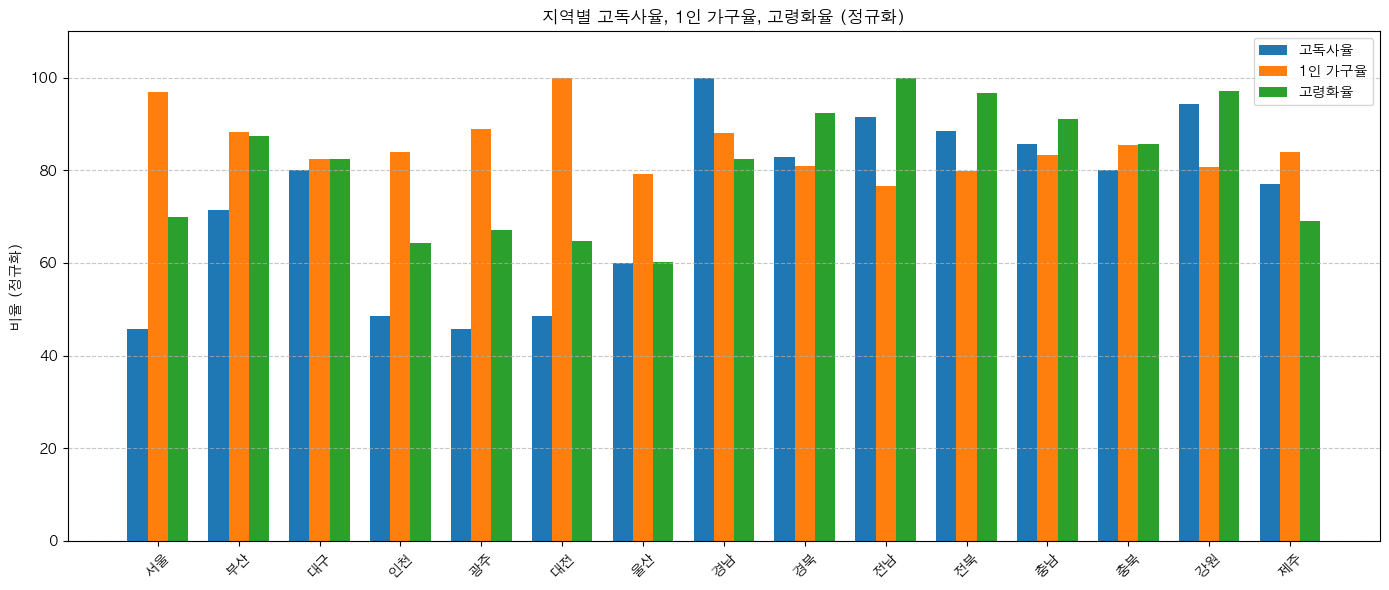

In [159]:

# 이미 읽어온 local_df에서 퍼센트 비율로 정규화
local_df_normalized = local_df.copy()

# 정규화: 각 열을 0~100 사이의 비율로 변환
for col in ['고독사율 (%)', '1인 가구율 (%)', '고령화율 (%)']:
    max_val = local_df_normalized[col].max()
    local_df_normalized[col] = (local_df_normalized[col] / max_val) * 100

# 막대그래프 (비율로 표시)
x = np.arange(len(local_df_normalized['지역']))  # 지역 수만큼 x축 설정
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, local_df_normalized['고독사율 (%)'], width, label='고독사율')
plt.bar(x, local_df_normalized['1인 가구율 (%)'], width, label='1인 가구율')
plt.bar(x + width, local_df_normalized['고령화율 (%)'], width, label='고령화율')

plt.ylim(0, 110)  # y축 범위 설정
plt.xticks(x, local_df_normalized['지역'], rotation=45)
plt.ylabel('비율 (정규화)')
plt.title('지역별 고독사율, 1인 가구율, 고령화율 (정규화)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()